In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
import time as time
from sklearn import preprocessing
from sklearn.metrics import f1_score
from apriori_python import apriori as apriori_ap
from apyori import apriori as apriori_apy
from efficient_apriori import apriori as apriori_eff
from fpgrowth_py import fpgrowth as fpgrowth_py_fp



warnings.filterwarnings('ignore')

In [111]:
#1
data = pd.read_csv('Market_Basket_Optimisation.csv.')
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

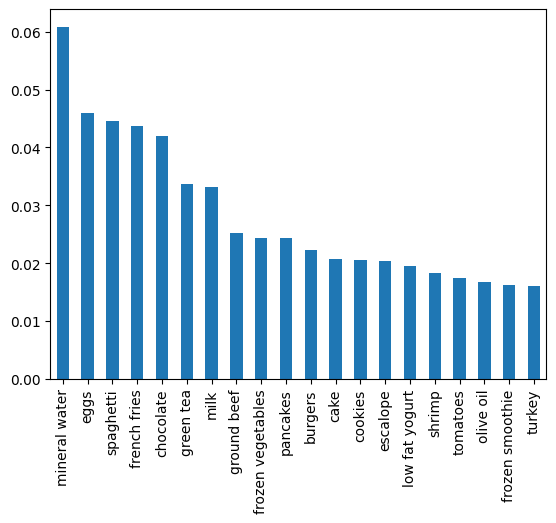

In [112]:
# 2 
data.stack().value_counts(normalize=True).head(20).plot(kind='bar')

<AxesSubplot: >

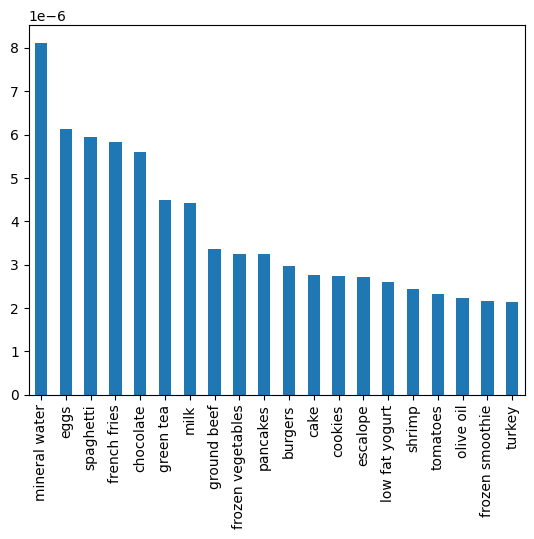

In [113]:
data.stack().value_counts(normalize=True).apply(lambda x: x/data.shape[0]).head(20).plot(kind='bar')

In [114]:
# 3 - 4
transactions = []
for i in range(0, data.shape[0]):
    row = data.iloc[i].dropna().tolist()
    transactions.append(row)

minSupport = 0.02
minConfidence = 0.2

worktimes = []

start = time.time()
itemsets, rules_ap = apriori_ap(transactions, minSup=minSupport, minConf=minConfidence)
worktimes.append(time.time() - start)

start = time.time()
rules_a = apriori_apy(
    transactions, 
    min_support=0.02,
    min_confidence=0.2,
    min_lift=1.001,
    )
worktimes.append(time.time() - start)

start = time.time()
itemsets, rules_ea = apriori_eff(transactions, min_support=minSupport, min_confidence=minConfidence)
worktimes.append(time.time() - start)

start = time.time()
itemsets, rules_fp = fpgrowth_py_fp(transactions, minSupRatio=minSupport, minConf=minConfidence)
worktimes.append(time.time() - start)



Время работы алгоритма apriori_python:  2.751181125640869
Время работы алгоритма apyori:  0.0
Время работы алгоритма efficient_apriori:  0.02194809913635254
Время работы алгоритма fpgrowth_py:  0.5915961265563965


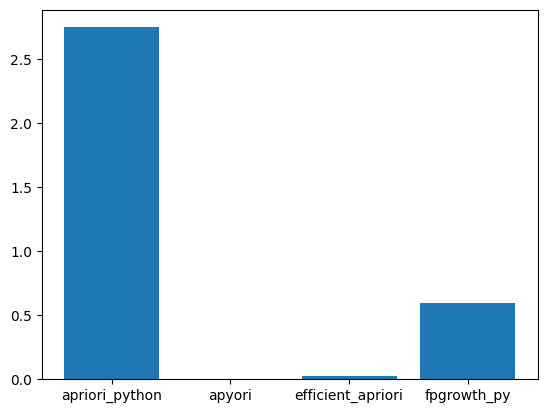

In [115]:
# 5

print('Время работы алгоритма apriori_python: ', worktimes[0])
print('Время работы алгоритма apyori: ', worktimes[1])
print('Время работы алгоритма efficient_apriori: ', worktimes[2])
print('Время работы алгоритма fpgrowth_py: ', worktimes[3])

plt.bar(['apriori_python', 'apyori', 'efficient_apriori', 'fpgrowth_py'], worktimes)
plt.show()

<AxesSubplot: >

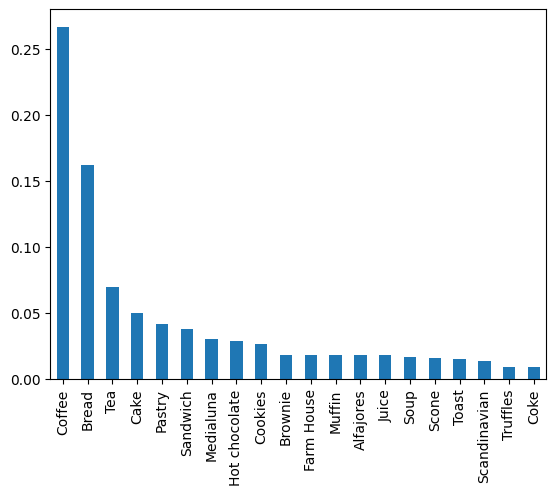

In [116]:
#6 -7
data2 = pd.read_csv('data.csv.')
data2.stack().value_counts(normalize=True).head(20).plot(kind='bar')

<AxesSubplot: >

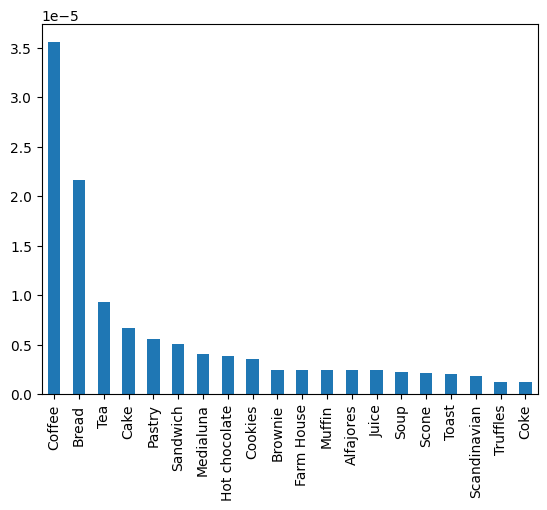

In [117]:
data2.stack().value_counts(normalize=True).apply(lambda x: x/data.shape[0]).head(20).plot(kind='bar')

In [118]:
# 8 - 9
transactions2 = []
for i in range(0, data2.shape[0]):
    row = data2.iloc[i].dropna().tolist()
    transactions2.append(row)

minSupport2 = 0.02
minConfidence2 = 0.2

worktimes2 = []

start = time.perf_counter()
itemsets2, rules_ap2 = apriori_ap(transactions2, minSup=minSupport2, minConf=minConfidence2)
worktimes2.append(time.perf_counter() - start)

start = time.perf_counter()
rules_a2 = apriori_apy(
    transactions2,
    min_support=minSupport2,
    min_confidence=minConfidence2,
    min_lift=1.001,
    )
worktimes2.append(time.perf_counter() - start)

start = time.time()
itemsets2, rules_ea2 = apriori_eff(transactions2, min_support=minSupport2, min_confidence=minConfidence2)
worktimes2.append(time.time() - start)

start = time.time()
itemsets2, rules_fp2 = fpgrowth_py_fp(transactions2, minSupRatio=minSupport2, minConf=minConfidence2)
worktimes2.append(time.time() - start)

Время работы алгоритма apriori_python:  0.40837250009644777
Время работы алгоритма apyori:  0.0006374999647960067
Время работы алгоритма efficient_apriori:  0.008078336715698242
Время работы алгоритма fpgrowth_py:  0.2821977138519287


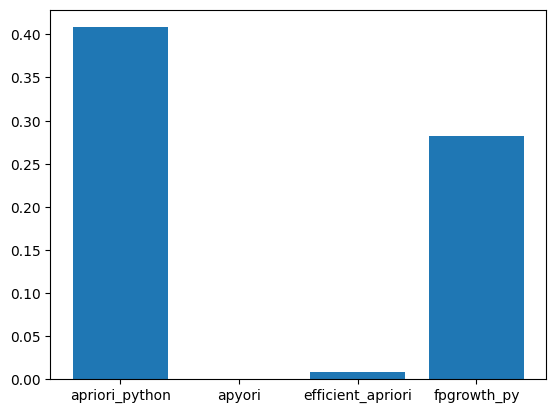

In [119]:
#9
print('Время работы алгоритма apriori_python: ', worktimes2[0])
print('Время работы алгоритма apyori: ', worktimes2[1])
print('Время работы алгоритма efficient_apriori: ', worktimes2[2])
print('Время работы алгоритма fpgrowth_py: ', worktimes2[3])

plt.bar(['apriori_python', 'apyori', 'efficient_apriori', 'fpgrowth_py'], worktimes2)
plt.show()